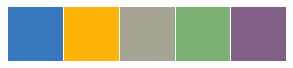

In [348]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sb.palplot(sb.xkcd_palette(colors))

In [349]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import interp

In [350]:
df = pd.read_csv('user_base.csv')

In [351]:
df.shape

(169, 22)

In [352]:
df.head()

Unnamed: 0                                              title  \
0           0                                                NaN   
1          12  ACompleteMachineLearningProjectWalkThroughinPy...   
2          25                          ACryptocoinYouWanttoSpend   
3          38    AFeatureSelectionToolforMachineLearninginPython   
4          55              AGuidetoBecomingaFullStackDeveloperin   

                  Author  Claps_max  topic_max  al_log_avg  \
0  Dovydas Reinikevicius    21000.0          0    0.819386   
1       William Koehrsen     8900.0          1    0.204970   
2            REMECoin.io     7600.0          0    1.752779   
3       William Koehrsen     3600.0          1    0.122830   
4        Daniel Borowski    48000.0          5    0.527692   

   author_loyalty_avg  comments_max  complex_max  days_open_max  \
0            2.400722            19    97.200000             62   
1            1.251257            14    87.352727             68   
2            7.000000             1    81.460000            171   
3            1.143520            13    75.483333             31   
4            1.938571            25    89.186667            478   

            ...            follwersa_max  ref_count_max  sent_max  tl_log_avg  \
0           ...                   2400.0              0  0.484110    2.425349   
1           ...                      0.0             23  0.076845    1.429189   
2           ...                   1000.0              6  0.000000    1.379545   
3           ...                      0.0             13  0.326617    1.300244   
4           ...                  11400.0             14  0.254243    1.329968   

   topic_loyalty_avg  success_avg  success_len  words_max  title_sent_max  \
0          12.791667     0.083333           12         74             0.0   
1           5.515385     0.153846           13        278             0.0   
2           4.384615     0.461538           13         47             0.0   
3           4.500000     0.176471           17        230             0.0   
4           4.358333     0.600000           10         53             0.0   

                  top_ref  
0                     NaN  
1  towardsdatascience.com  
2         www.remecoin.io  
3              github.com  
4       stackoverflow.com  

[5 rows x 22 columns]

In [353]:
df = df.drop('Unnamed: 0',axis = 1)

In [354]:
df.describe()

Claps_max   topic_max  al_log_avg  author_loyalty_avg  \
count     169.000000  169.000000  169.000000          169.000000   
mean    22835.982249    1.272189    0.642574            2.717522   
std     31330.567775    1.400424    0.649072            2.876044   
min       221.000000    0.000000    0.013805            1.014464   
25%      3800.000000    0.000000    0.153092            1.182148   
50%     10500.000000    1.000000    0.292213            1.383532   
75%     28000.000000    2.000000    0.955062            2.882547   
max    210000.000000    5.000000    2.563903           15.000000   

       comments_max  complex_max  days_open_max  figures_max  followinga_max  \
count    169.000000   168.000000     169.000000   169.000000      168.000000   
mean      25.976331    88.714455     146.923077     6.887574      295.386905   
std       44.457571    20.895339     266.602701     6.453526      906.633894   
min        0.000000    33.580000       9.000000     0.000000        0.000000   
25%        4.000000    78.965000      37.000000     2.000000        0.000000   
50%       17.000000    88.358750      74.000000     5.000000        1.000000   
75%       28.000000   101.118900     137.000000    10.000000       15.250000   
max      371.000000   162.510000    2163.000000    46.000000     7100.000000   

       follwersa_max  ref_count_max    sent_max  tl_log_avg  \
count     169.000000     169.000000  142.000000  169.000000   
mean    12808.627219       6.656805    0.330367    1.626674   
std     38255.027702       6.854827    0.209324    0.602098   
min         0.000000       0.000000   -1.000000    0.660682   
25%         0.000000       2.000000    0.222247    1.168259   
50%        36.000000       4.000000    0.324861    1.457610   
75%      5700.000000      10.000000    0.453680    2.161541   
max    203000.000000      52.000000    1.000000    3.053626   

       topic_loyalty_avg  success_avg  success_len    words_max  \
count         169.000000   169.000000   169.000000   169.000000   
mean            7.194071     0.172123    15.047337   259.591716   
std             4.546299     0.140066     6.250534   310.920741   
min             2.163636     0.000000    10.000000     0.000000   
25%             3.731818     0.066667    11.000000    45.000000   
50%             5.093651     0.166667    13.000000   128.000000   
75%            10.705333     0.250000    17.000000   352.000000   
max            22.083333     0.894737    51.000000  1403.000000   

       title_sent_max  
count           169.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

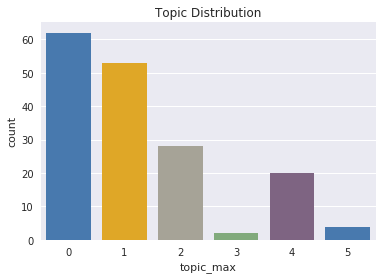

In [355]:
sb.countplot(df['topic_max'], palette = sb.xkcd_palette(colors))
plt.title("Topic Distribution")
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


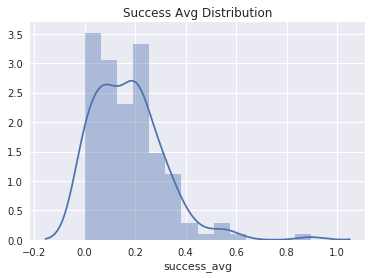

In [356]:
sb.distplot(df['success_avg'])
plt.title("Success Avg Distribution")
plt.show()

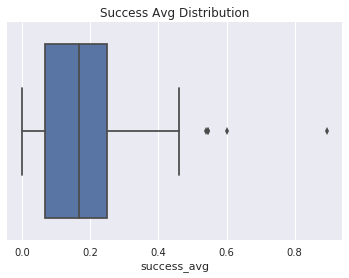

In [357]:
sb.boxplot(df['success_avg'])
plt.title("Success Avg Distribution")
plt.show()

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


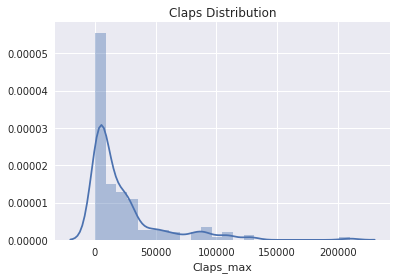

In [358]:
sb.distplot(df['Claps_max'])
plt.title("Claps Distribution")
plt.show()

In [359]:
##Decide Cut-off
cut_off = .2
df['Success']=np.where((df['success_avg']>cut_off),1,0)

In [360]:
df['Success'].value_counts()

0    113
1     56
Name: Success, dtype: int64

In [361]:
#PCA
#PCA on Country
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def create_matrix(df,row_name,col_name,value_name):
    '''Creates a matrix needed for PCA.
    Enter row_name, and col_name as strings'''
    dataframe = df[[row_name,col_name]]
    matrix = pd.pivot_table(df,index = row_name,columns = col_name,values = value_name, aggfunc=np.mean,fill_value = 0)
    #print(matrix.shape)
    #matrix = matrix.drop_duplicates()
    #print(matrix.shape)
    #print(matrix.head())
    return matrix

def standardize(matrix):
    '''Takes in a matrix and returns a standaridzed matrix.'''
    scaler = StandardScaler().fit(matrix)
    rescaled_matrix = scaler.transform(matrix)
    return rescaled_matrix

#PCA
def PCA_analysis(matrix,rescaled_matrix,n_components):
    '''Takes rescaled matrix and runs initial PCA.
    Returns final df with PCA cols'''
    pca = PCA(n_components = n_components,svd_solver = 'auto')
    fit = pca.fit(rescaled_matrix)
    d2 = pca.transform(rescaled_matrix)
    #print(np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100))
    d2_df = pd.DataFrame(d2)
    d2_df.index = pd.DataFrame(data=matrix).index
    col_headers = []
    for x in range(n_components):
        col_headers.append('PC'+str(x+1))
    d2_df.columns = col_headers
    #Plot 100 components
    pca_big = PCA(n_components=80)
    fit_big = pca_big.fit_transform(rescaled_matrix)
    var = np.cumsum(np.round(pca_big.explained_variance_ratio_,decimals=5)*100)
    #print(var)
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Features')
    plt.title('PCA Analysis')
    plt.ylim(0,100.5)
    plt.style.context('seaborn-whitegrid')
    plt.plot(var)
    return d2_df

#Put it all together
def agg_PCA(df,row_name,col_name,value_name,n_components):
    m = create_matrix(df,row_name,col_name,value_name)
    rm = standardize(m)
    df_final = PCA_analysis(m,rm,n_components)
    
    return df_final

def PCA_merge(data,pca1,pca2):
    data = pd.merge(data, pca1, how='left', left_on='artist_name', left_index=False, right_index=True)
    data = pd.merge(data, pca2, how='left', left_on='artist_name', left_index=False, right_index=True)
    return data
# call the functions
#rc_pca_df = agg_PCA(df,'Company_Name','',10)
#pl_pca_df = agg_PCA(data,'artist_name','playlist_id',20)
#data = PCA_merge(data,rc_pca_df,pl_pca_df)

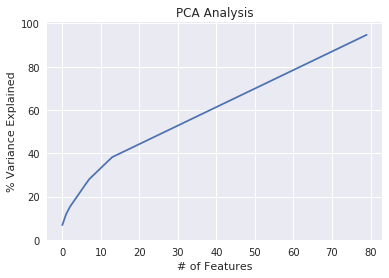

In [362]:
author_pca=agg_PCA(df,'Author','title','success_avg',10)

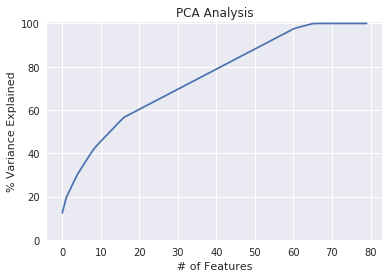

In [363]:
ref_pca=agg_PCA(df,'top_ref','title','success_avg',10)

In [364]:
data = df.merge(author_pca, left_on = 'Author',right_index = True,how = 'left')

In [365]:
data.shape

(169, 32)

In [366]:
data = data.merge(ref_pca, left_on ='top_ref',right_index = True, how = 'left')

In [367]:
data.shape

(169, 42)

In [368]:
data.columns

Index(['title', 'Author', 'Claps_max', 'topic_max', 'al_log_avg',
       'author_loyalty_avg', 'comments_max', 'complex_max', 'days_open_max',
       'figures_max', 'followinga_max', 'follwersa_max', 'ref_count_max',
       'sent_max', 'tl_log_avg', 'topic_loyalty_avg', 'success_avg',
       'success_len', 'words_max', 'title_sent_max', 'top_ref', 'Success',
       'PC1_x', 'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x',
       'PC9_x', 'PC10_x', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y',
       'PC7_y', 'PC8_y', 'PC9_y', 'PC10_y'],
      dtype='object')

In [375]:
data.groupby('top_ref')['PC3_y'].sum().sort_values(ascending = False).head(5)

top_ref
en.wikipedia.org          116.591755
towardsdatascience.com     18.275938
www.uspto.gov               1.382761
blogs.nature.com            1.382761
github.com                  1.070726
Name: PC3_y, dtype: float64

In [268]:
data['log_claps']=data['Claps_max'].apply(np.log)

In [269]:
from sklearn.preprocessing import Imputer
data['sent_max']=data['sent_max'].fillna(0)
data['complex_max']=data['complex_max'].fillna(0)
data['followinga_max']=data['followinga_max'].fillna(0)
data['follwersa_max']=data['follwersa_max'].fillna(0)
fix = Imputer(missing_values = 0, strategy = 'median',axis = 0).fit_transform(data[['followinga_max','follwersa_max','sent_max','complex_max']])
fix = pd.DataFrame(fix,columns = ['following','followers','sent','complex'])

In [270]:
data = data.merge(fix,left_index = True, right_index = True)
data = data.drop(['followinga_max','follwersa_max','sent_max','complex_max'],axis = 1)

In [271]:
data.shape

(169, 43)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


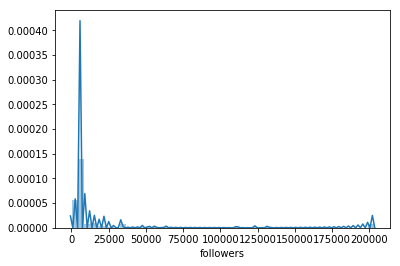

In [272]:
sb.distplot(data['followers'])

In [273]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

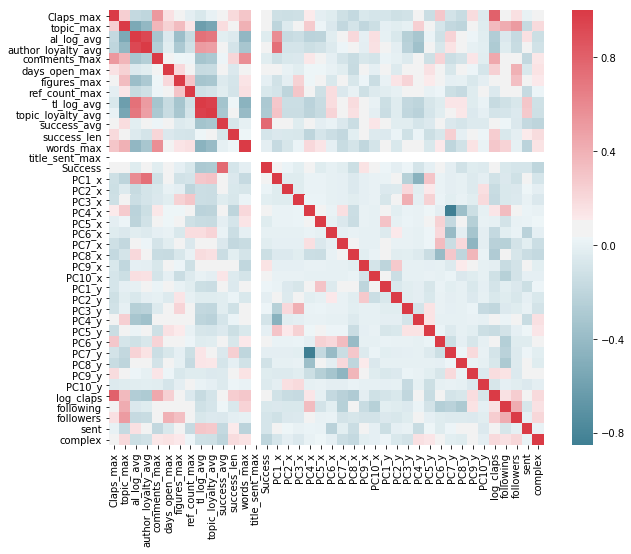

In [274]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [275]:
data = data.drop(['author_loyalty_avg','topic_loyalty_avg','Claps_max'],axis = 1)

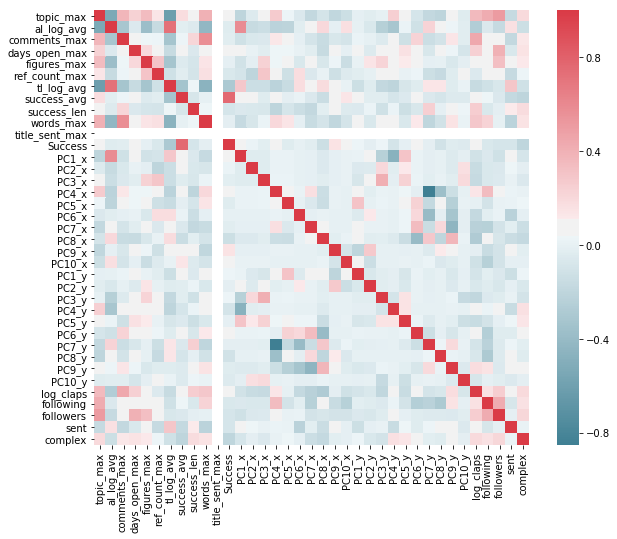

In [276]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [277]:
data = data.drop(['success_len','success_avg'],axis = 1)

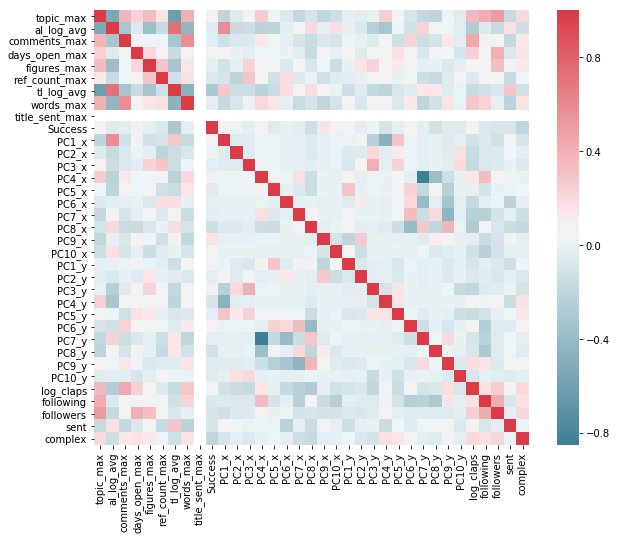

In [278]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sb.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [279]:
data.Success.value_counts()

0    113
1     56
Name: Success, dtype: int64

In [280]:
data.columns

Index(['title', 'Author', 'topic_max', 'al_log_avg', 'comments_max',
       'days_open_max', 'figures_max', 'ref_count_max', 'tl_log_avg',
       'words_max', 'title_sent_max', 'top_ref', 'Success', 'PC1_x', 'PC2_x',
       'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'PC9_x', 'PC10_x',
       'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y', 'PC7_y', 'PC8_y',
       'PC9_y', 'PC10_y', 'log_claps', 'following', 'followers', 'sent',
       'complex'],
      dtype='object')

In [281]:
logs = data[['comments_max','days_open_max','figures_max','ref_count_max','words_max','followers','following','sent','complex']]
logs = (logs+0.1).apply(np.log)
logs.columns = ['l_comments','l_days','l_figs','l_ref_count','l_words','l_followers','l_following','l_sent','l_complex']
data = data.merge(logs, left_index = True, right_index = True)
data=data.drop(['comments_max','days_open_max','figures_max','ref_count_max','words_max','followers','following','sent','complex'],axis =1)
data.shape

(169, 38)

In [282]:
data.describe()

topic_max  al_log_avg  tl_log_avg  title_sent_max     Success  \
count  169.000000  169.000000  169.000000           169.0  169.000000   
mean     1.272189    0.642574    1.626674             0.0    0.331361   
std      1.400424    0.649072    0.602098             0.0    0.472101   
min      0.000000    0.013805    0.660682             0.0    0.000000   
25%      0.000000    0.153092    1.168259             0.0    0.000000   
50%      1.000000    0.292213    1.457610             0.0    0.000000   
75%      2.000000    0.955062    2.161541             0.0    1.000000   
max      5.000000    2.563903    3.053626             0.0    1.000000   

            PC1_x       PC2_x       PC3_x         PC4_x         PC5_x  \
count  159.000000  159.000000  159.000000  1.590000e+02  1.590000e+02   
mean     1.091531    0.990278    0.675305 -1.512723e-01 -1.461578e-01   
std      6.218225    5.374862    4.121601  2.764213e+00  2.498993e+00   
min     -0.976781   -0.621682   -0.581693 -1.110317e+01 -3.873181e+00   
25%     -0.318197   -0.306907   -0.190173 -3.743533e-15  6.314393e-16   
50%     -0.272298   -0.244906   -0.190173 -1.405126e-16  6.765422e-15   
75%     -0.272298   -0.244906   -0.142288  2.319325e-15  6.841749e-15   
max     28.012953   24.249520   19.799529  1.202615e+01  1.549272e+01   

          ...       log_claps  l_comments      l_days      l_figs  \
count     ...      169.000000  169.000000  169.000000  169.000000   
mean      ...        9.222968    2.031549    4.315897    1.533908   
std       ...        1.354474    2.141426    1.044026    0.975910   
min       ...        5.398163   -2.302585    2.208274   -2.302585   
25%       ...        8.242756    1.410987    3.613617    0.741937   
50%       ...        9.259131    2.839078    4.305416    1.629241   
75%       ...       10.239960    3.335770    4.920711    2.312535   
max       ...       12.254863    5.916472    7.679298    3.830813   

       l_ref_count     l_words  l_followers  l_following      l_sent  \
count   169.000000  169.000000   169.000000   169.000000  168.000000   
mean      1.367746    4.672117     8.486586     2.888131   -0.877440   
std       1.253692    1.592478     1.553403     2.066636    0.375149   
min      -2.302585   -2.302585     3.586293     0.095310   -2.193389   
25%       0.741937    3.808882     8.476392     1.960095   -1.036613   
50%       1.410987    4.852811     8.612522     2.312535   -0.850312   
75%       2.312535    5.863915     8.648239     2.714695   -0.644357   
max       3.953165    7.246439    12.220962     8.867864    0.095310   

        l_complex  
count  169.000000  
mean     4.456304  
std      0.256380  
min      3.516904  
25%      4.371850  
50%      4.482536  
75%      4.616260  
max      5.091355  

[8 rows x 35 columns]

In [283]:
data.dtypes

title              object
Author             object
topic_max           int64
al_log_avg        float64
tl_log_avg        float64
title_sent_max    float64
top_ref            object
Success             int64
PC1_x             float64
PC2_x             float64
PC3_x             float64
PC4_x             float64
PC5_x             float64
PC6_x             float64
PC7_x             float64
PC8_x             float64
PC9_x             float64
PC10_x            float64
PC1_y             float64
PC2_y             float64
PC3_y             float64
PC4_y             float64
PC5_y             float64
PC6_y             float64
PC7_y             float64
PC8_y             float64
PC9_y             float64
PC10_y            float64
log_claps         float64
l_comments        float64
l_days            float64
l_figs            float64
l_ref_count       float64
l_words           float64
l_followers       float64
l_following       float64
l_sent            float64
l_complex         float64
dtype: objec

In [284]:
data.isnull().sum()

title             16
Author             0
topic_max          0
al_log_avg         0
tl_log_avg         0
title_sent_max     0
top_ref           14
Success            0
PC1_x             10
PC2_x             10
PC3_x             10
PC4_x             10
PC5_x             10
PC6_x             10
PC7_x             10
PC8_x             10
PC9_x             10
PC10_x            10
PC1_y             22
PC2_y             22
PC3_y             22
PC4_y             22
PC5_y             22
PC6_y             22
PC7_y             22
PC8_y             22
PC9_y             22
PC10_y            22
log_claps          0
l_comments         0
l_days             0
l_figs             0
l_ref_count        0
l_words            0
l_followers        0
l_following        0
l_sent             1
l_complex          0
dtype: int64

In [285]:
data = data.fillna(0)

In [286]:
data = data.drop(['top_ref'],axis = 1)

In [287]:
data.Success.value_counts()

0    113
1     56
Name: Success, dtype: int64

In [288]:
# Class balance
from sklearn.utils import resample

# succ_rat: 0.0 - 1.0
# if 0.6, 60% of final data would be succ
def up_succ(data, succ_rat):
    
    data_succ = data[data.Success == 1]
    data_not_succ = data[data.Success == 0]
    
    data_upped = resample(data_succ,
                         replace = True,
                         n_samples = int(0.5*(len(data_not_succ) * succ_rat) / (1 - succ_rat)))
    data_upped_ns = resample(data_not_succ,
                         replace = True,
                         n_samples = int(0.5*(len(data_not_succ))))
    
    data_out = pd.concat([data_upped, data_upped_ns])
    print('Upsampled data')
    print(data_out.groupby('Success')['Success'].count())
    return data_out

def dn_succ(data, succ_rat):
    
    data_succ = data[data.Success == 1]
    data_not_succ = data[data.Success == 0]
    data_downed = resample(data_not_succ,
                          replace = True,
                          n_samples = int((len(data_succ) * (1 - succ_rat))/succ_rat))
    
    data_out = pd.concat([data_succ, data_downed])
    print('\n Downsampled data')
    print(data_out.groupby('Success')['Success'].count())
    return data_out

In [289]:
us = up_succ(data,.4)
ds = dn_succ(data,.4)

Upsampled data
Success
0    56
1    37
Name: Success, dtype: int64

 Downsampled data
Success
0    84
1    56
Name: Success, dtype: int64


In [290]:
data.Success.value_counts()

0    113
1     56
Name: Success, dtype: int64

In [291]:
# Separate majority and minority classes
df_majority = data[data.Success==0]
df_minority = data[data.Success==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=113,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Success.value_counts()

1    113
0    113
Name: Success, dtype: int64

In [292]:
X = df_upsampled.drop(['Success','title','Author'],axis = 1)
X.index = df_upsampled[['title','Author']]
Y = df_upsampled['Success']
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train,Y_validation=train_test_split(X,Y,test_size = validation_size, random_state = seed)

In [293]:
def get_eval_ROC(model,X,Y):
    # This will evaluate traning result
    # and present results as the ROC curve
    # X,Y from training set
    kfold = KFold(n_splits=5, random_state=7)
    base_fpr = np.linspace(0, 1, 101)
    
    title = "Model: "+ str(model).split('(')[0]
    plt.figure(figsize=(5, 5))
    plt.title(title)
    
    results = []
    X = np.array(X)
    Y = np.array(Y)
    for i, (train, test) in enumerate(kfold.split(X)):
        y_score = model.fit(X[train], Y[train]).predict_proba(X[test])
        fpr, tpr, _ = roc_curve(Y[test], y_score[:, 1])

        plt.plot(fpr, tpr, 'b', alpha=0.15)
        tpr = interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        results.append(tpr)

    results = np.array(results)
    mean_results = results.mean(axis=0)
    std = results.std(axis=0)

    res_upper = np.minimum(mean_results + std, 1)
    res_lower = mean_results - std
    print(title)
    print("ROC: %.3f (%.3f)" % (results.mean(), results.std()))
    print("True Positive Rate: %.3f , False Positive Rate: %.3f\n" % (tpr.mean(), fpr.mean()))
    plt.plot(base_fpr, mean_results, 'b')
    plt.fill_between(base_fpr, res_lower, res_upper, color='grey', alpha=0.3)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')

In [294]:
def get_val_ROC(model, train, test, y_train, y_test): 
    # make prediction and calculate the ROC
    base_fpr = np.linspace(0, 1, 101)
    title = "Model: "+ str(model).split('(')[0]
    results = []
    x_train = np.array(train)
    y_train = np.array(y_train)
    x_test = np.array(test)
    y_test = np.array(y_test)
    
    y_score = model.fit(x_train, y_train).predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    results.append(tpr)
    
    results = np.array(results)
    mean_results = results.mean(axis=0)
    std = results.std(axis=0)
    
     # plotting
    plt.figure(figsize=(5, 5))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8) #baseline
    plt.plot(*roc_curve(y_test, y_score[:,1])[:2])
    print('\n',title)
    print("ROC: %.3f (%.3f)" % (results.mean(), results.std()))
    print("True Positive Rate: %.3f , False Positive Rate: %.3f" % (tpr.mean(), fpr.mean()))
    res = results.mean()
    return res

In [343]:
def get_cm(model,x_train, y_train, x_test,y_test):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    matrix = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    print("Accuracy:"+str(accuracy))
    tn,fp,fn,tp = matrix.ravel()
    
    title = str(model).split('(')[0]
    print('Model:'+title)
    sb.set(font_scale = 1)
    sb.heatmap(matrix,annot = True, fmt = 'g', annot_kws={'size':16})

Model: LogisticRegression
ROC: 0.739 (0.280)
True Positive Rate: 0.749 , False Positive Rate: 0.426

Model: KNeighborsClassifier
ROC: 0.636 (0.333)
True Positive Rate: 0.609 , False Positive Rate: 0.436

Model: DecisionTreeClassifier
ROC: 0.785 (0.270)
True Positive Rate: 0.855 , False Positive Rate: 0.368

Model: GaussianNB
ROC: 0.673 (0.282)
True Positive Rate: 0.655 , False Positive Rate: 0.465



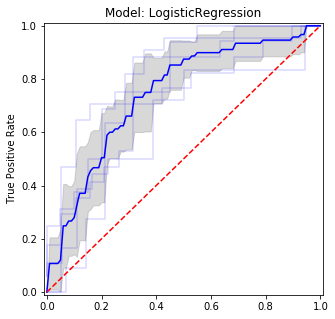

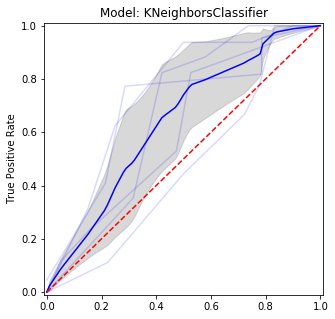

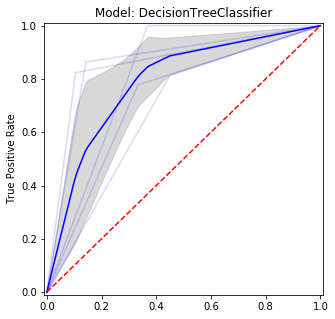

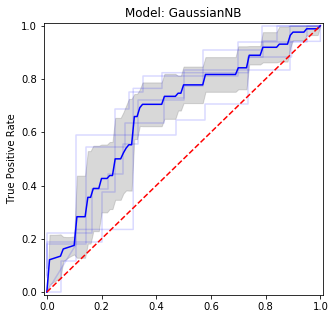

In [295]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
for name,model in models:
    get_eval_ROC(model,X_train,Y_train)

Model: Pipeline
ROC: 0.768 (0.281)
True Positive Rate: 0.699 , False Positive Rate: 0.424

Model: Pipeline
ROC: 0.714 (0.283)
True Positive Rate: 0.705 , False Positive Rate: 0.368

Model: Pipeline
ROC: 0.761 (0.286)
True Positive Rate: 0.806 , False Positive Rate: 0.421

Model: Pipeline
ROC: 0.673 (0.282)
True Positive Rate: 0.655 , False Positive Rate: 0.465



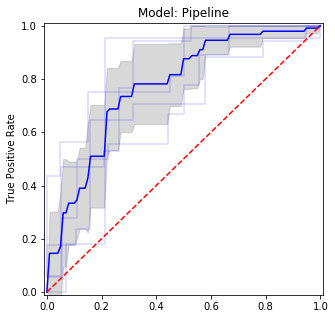

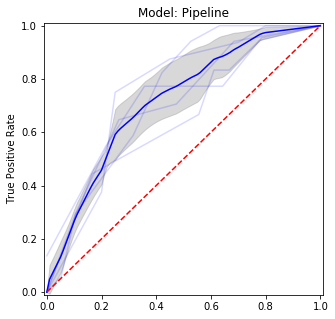

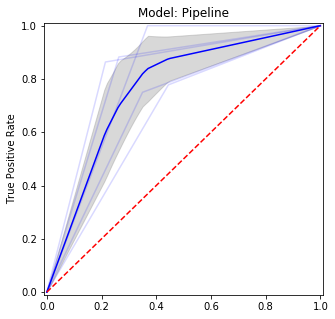

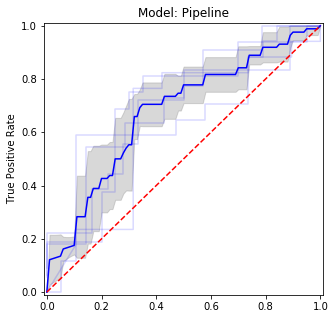

In [296]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
#pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    get_eval_ROC(model,X_train,Y_train)


Model: AdaBoostClassifier
ROC: 0.855 (0.237)
True Positive Rate: 0.813 , False Positive Rate: 0.341

Model: GradientBoostingClassifier
ROC: 0.855 (0.214)
True Positive Rate: 0.881 , False Positive Rate: 0.355

Model: RandomForestClassifier
ROC: 0.880 (0.148)
True Positive Rate: 0.837 , False Positive Rate: 0.364

Model: ExtraTreesClassifier
ROC: 0.876 (0.131)
True Positive Rate: 0.899 , False Positive Rate: 0.401



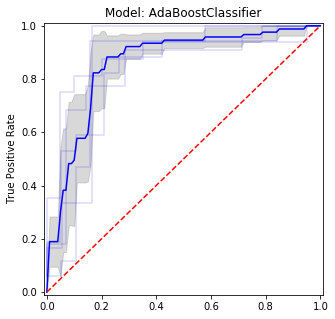

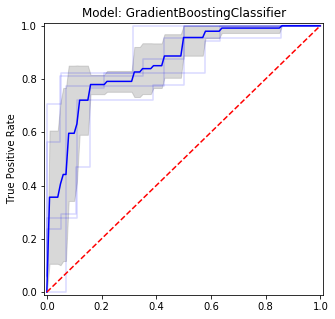

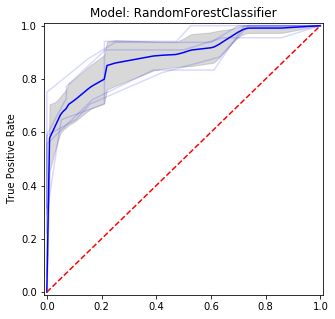

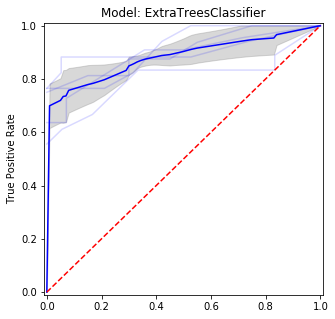

In [297]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    get_eval_ROC(model,X_train,Y_train)


 Model: AdaBoostClassifier
ROC: 0.898 (0.152)
True Positive Rate: 0.898 , False Positive Rate: 0.326

 Model: GradientBoostingClassifier
ROC: 0.900 (0.113)
True Positive Rate: 0.900 , False Positive Rate: 0.344

 Model: RandomForestClassifier
ROC: 0.928 (0.137)
True Positive Rate: 0.928 , False Positive Rate: 0.382

 Model: ExtraTreesClassifier
ROC: 0.966 (0.099)
True Positive Rate: 0.966 , False Positive Rate: 0.342


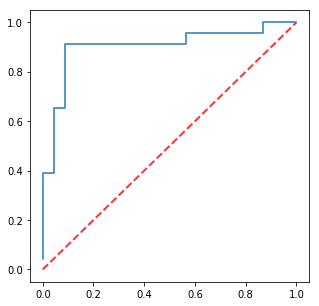

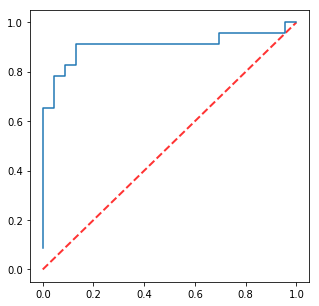

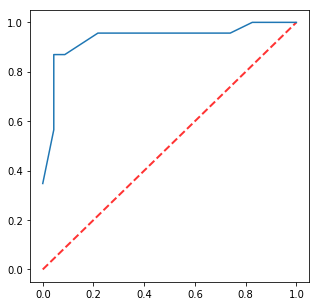

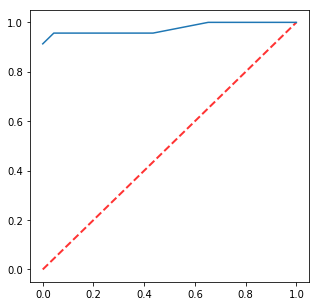

In [298]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    get_val_ROC(model,X_train,X_validation,Y_train,Y_validation)


 Model: LogisticRegression
ROC: 0.703 (0.230)
True Positive Rate: 0.703 , False Positive Rate: 0.390

 Model: KNeighborsClassifier
ROC: 0.725 (0.298)
True Positive Rate: 0.725 , False Positive Rate: 0.441

 Model: DecisionTreeClassifier
ROC: 0.866 (0.228)
True Positive Rate: 0.866 , False Positive Rate: 0.391

 Model: GaussianNB
ROC: 0.590 (0.250)
True Positive Rate: 0.590 , False Positive Rate: 0.465


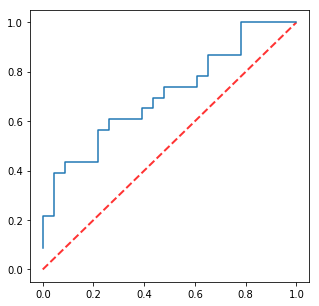

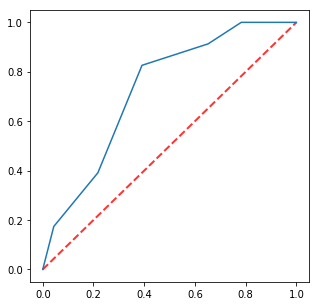

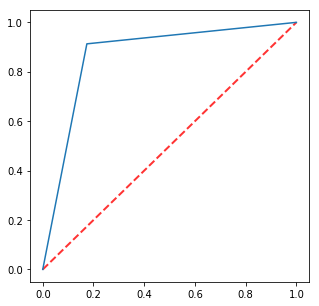

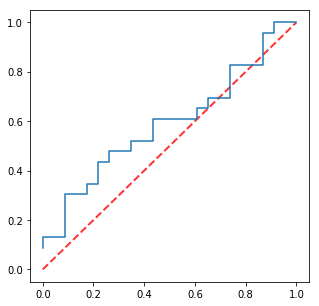

In [299]:

for name, model in models:
    get_val_ROC(model,X_train,X_validation,Y_train,Y_validation)

In [300]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
def knngridsearch(range_max,X,Y):
    # define the parameter values that should be searched
    # for python 2, k_range = range(1, 31)
    k_range = list(range(1, range_max))
    print(k_range)
    # create a parameter grid: map the parameter names to the values that should be searched
    # simply a python dictionary
    # key: parameter name
    # value: list of values that should be searched for that parameter
    # single key-value pair for param_grid
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)
    # instantiate the grid
    knn = KNeighborsClassifier(n_neighbors = 5)
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='roc_auc')
    # fit the grid with data
    grid.fit(X, Y)
    grid.grid_scores_
    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)
    plt.plot(k_range,grid_mean_scores)
    plt.xlabel('Value for K for KNN')
    plt.ylabel('Cross-Validated Accuracy') 
    print('Best params: ', grid.best_params_)
    print('Best score: ', grid.best_score_)
    return grid.best_estimator_

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]}
[0.7388888888888889, 0.7006172839506174, 0.6864197530864197, 0.6765432098765432, 0.671604938271605, 0.6648148148148147, 0.6746913580246914, 0.682716049382716, 0.6580246913580247, 0.6481481481481481, 0.6358024691358025, 0.6265432098765432, 0.6030864197530863, 0.5919753086419752]
Best params:  {'n_neighbors': 1}
Best score:  0.7388888888888889
Model: KNeighborsClassifier
ROC: 0.688 (0.305)
True Positive Rate: 0.751 , False Positive Rate: 0.439



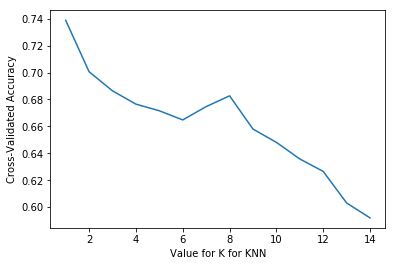

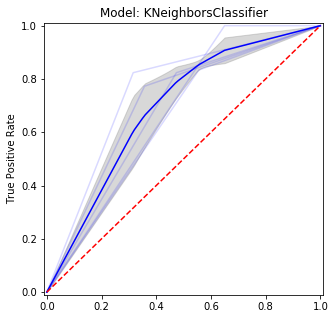

In [301]:
get_eval_ROC(knngridsearch(15,X_train,Y_train),X_train,Y_train)

In [302]:
def randomforestgrid(X,Y):
    rfc = RandomForestClassifier() 
    # Use a grid over parameters of interest
    param_grid = { 
               "n_estimators" : [9, 18, 20],
               "max_depth" : [1, 5, 10, 15],
               "min_samples_leaf" : [1, 2, 4]} 
    print('\n-------------------------')
    print('Starting grid search')
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring='roc_auc')
    print('fitting')
    CV_rfc.fit(X, Y)
    print('grid search done')
    print('Best params: ', CV_rfc.best_params_)
    print('Best score: ', CV_rfc.best_score_)
    return CV_rfc.best_estimator_


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 18}
Best score:  0.9197530864197533
Model: RandomForestClassifier
ROC: 0.879 (0.170)
True Positive Rate: 0.881 , False Positive Rate: 0.309



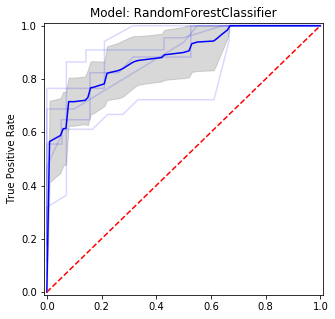

In [303]:
get_eval_ROC(randomforestgrid(X_train,Y_train),X_train,Y_train)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 18}
Best score:  0.9135802469135803

 Model: RandomForestClassifier
ROC: 0.932 (0.104)
True Positive Rate: 0.932 , False Positive Rate: 0.327


0.9315281962978907

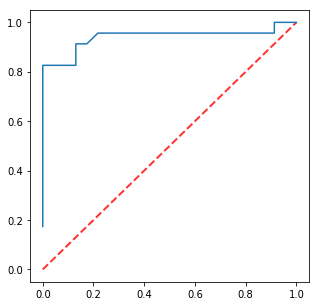

In [304]:
get_val_ROC(randomforestgrid(X_train,Y_train),X_train,X_validation,Y_train,Y_validation)

In [305]:
def select_features(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    clf = ExtraTreesClassifier()
    clf = clf.fit(X, y)
    print(clf.feature_importances_ )
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [306]:
def select_features_rf(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    rf = RandomForestClassifier()
    rf = rf.fit(X, y)
    print(rf.feature_importances_ )
    model = SelectFromModel(rf, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [307]:
def select_features_lr(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    lr = LogisticRegression()
    lr = lr.fit(X, y)
    print(lr.coef_ )
    model = SelectFromModel(lr, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [308]:
def select_features_gb(train,y_train):
    X, y = train,y_train
    print('previous shape: ',X.shape)
    lr = GradientBoostingClassifier()
    lr = lr.fit(X, y)
    print(lr.feature_importances_)
    model = SelectFromModel(lr, prefit=True)
    X_new = model.transform(X)
    print('new shape: ', X_new.shape)
    print(train.columns[model.get_support()])
    print(model.get_support())
    return X_new

In [309]:
X_new = select_features(X_train,Y_train)

previous shape:  (180, 34)
[0.03022826 0.08136927 0.15836571 0.         0.02346336 0.01931974
 0.01190653 0.00244399 0.01381442 0.         0.00708097 0.03016845
 0.00810475 0.02733596 0.01525379 0.02166392 0.01627036 0.01481149
 0.02792606 0.00122487 0.00634216 0.00927792 0.01317954 0.01846245
 0.04624817 0.03397412 0.05719847 0.04306132 0.05196162 0.05551645
 0.02630202 0.0298636  0.04324995 0.05461032]
new shape:  (180, 13)
Index(['topic_max', 'al_log_avg', 'tl_log_avg', 'PC8_x', 'log_claps',
       'l_comments', 'l_days', 'l_figs', 'l_ref_count', 'l_words',
       'l_following', 'l_sent', 'l_complex'],
      dtype='object')
[ True  True  True False False False False False False False False  True
 False False False False False False False False False False False False
  True  True  True  True  True  True False  True  True  True]


In [310]:
X_new_rf=select_features_rf(X_train,Y_train)

previous shape:  (180, 34)
[0.0174001  0.08239654 0.09341225 0.         0.03033879 0.00926535
 0.03352682 0.01099817 0.00566906 0.00274054 0.00035112 0.03501899
 0.         0.01380584 0.02338654 0.01737386 0.0119456  0.00306322
 0.00954589 0.         0.00117647 0.00218191 0.01251466 0.01477965
 0.04376516 0.06126991 0.13502118 0.02928069 0.04468753 0.05887959
 0.06531784 0.01486294 0.05221461 0.06380918]
new shape:  (180, 13)
Index(['al_log_avg', 'tl_log_avg', 'PC1_x', 'PC3_x', 'PC8_x', 'log_claps',
       'l_comments', 'l_days', 'l_ref_count', 'l_words', 'l_followers',
       'l_sent', 'l_complex'],
      dtype='object')
[False  True  True False  True False  True False False False False  True
 False False False False False False False False False False False False
  True  True  True False  True  True  True False  True  True]


In [311]:
X_new_lr = select_features_lr(X_train,Y_train)

previous shape:  (180, 34)
[[-0.30883385  0.37361347 -2.5192089   0.          0.08946353  0.02079387
   0.01364317 -0.15585059 -0.2668094   0.44024275 -0.16849733 -0.81149676
   0.83221255  0.6023227   0.01154251 -0.140406    0.00374814  0.0224812
  -0.16933653 -0.29893521  0.27443486 -0.50857141  0.22865124 -0.02746617
   0.08246563 -0.03249438  0.5184652   0.01742396  0.08728749 -0.15633742
   0.44278372 -0.1750832  -0.53500397 -0.6727109 ]]
new shape:  (180, 11)
Index(['al_log_avg', 'tl_log_avg', 'PC6_x', 'PC8_x', 'PC9_x', 'PC10_x',
       'PC8_y', 'l_days', 'l_followers', 'l_sent', 'l_complex'],
      dtype='object')
[False  True  True False False False False False False  True False  True
  True  True False False False False False False False  True False False
 False False  True False False False  True False  True  True]


In [312]:
X_new_gb = select_features_gb(X_train,Y_train)

previous shape:  (180, 34)
[0.00349611 0.07621759 0.16808534 0.         0.00045511 0.
 0.01565022 0.00327397 0.         0.01016701 0.         0.01611297
 0.01121161 0.01421111 0.01090322 0.00683828 0.0037399  0.
 0.00519051 0.00102993 0.         0.00079869 0.0015974  0.01093116
 0.08128744 0.04458858 0.0789411  0.03962601 0.02034447 0.1127353
 0.06141637 0.041515   0.08037129 0.07926434]
new shape:  (180, 11)
Index(['al_log_avg', 'tl_log_avg', 'log_claps', 'l_comments', 'l_days',
       'l_figs', 'l_words', 'l_followers', 'l_following', 'l_sent',
       'l_complex'],
      dtype='object')
[False  True  True False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True False  True  True  True  True  True]


In [313]:
X_new_t = X_train[['al_log_avg','tl_log_avg','log_claps','l_days','l_words','l_followers','l_sent','l_complex','PC8_x','l_comments','PC3_y',
                  'l_following','l_figs','l_ref_count']]
X_new_v = X_validation[['al_log_avg','tl_log_avg','log_claps','l_days','l_words','l_followers','l_sent','l_complex','PC8_x','l_comments','PC3_y',
                  'l_following','l_figs','l_ref_count']]

Model: LogisticRegression
ROC: 0.750 (0.307)
True Positive Rate: 0.801 , False Positive Rate: 0.363

Model: KNeighborsClassifier
ROC: 0.709 (0.292)
True Positive Rate: 0.693 , False Positive Rate: 0.474

Model: DecisionTreeClassifier
ROC: 0.782 (0.267)
True Positive Rate: 0.806 , False Positive Rate: 0.421

Model: GaussianNB
ROC: 0.679 (0.301)
True Positive Rate: 0.722 , False Positive Rate: 0.444



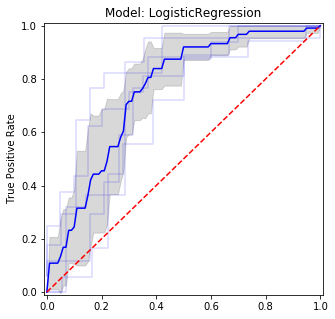

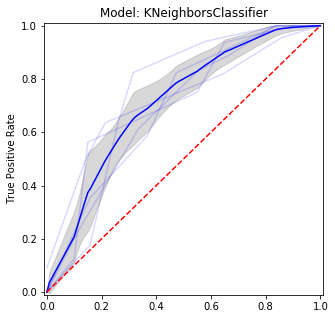

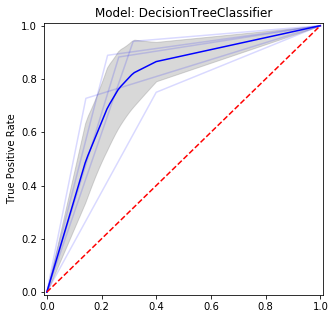

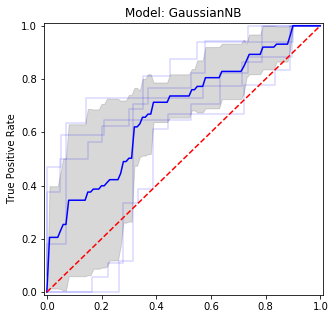

In [314]:
for name, model in models:
    get_eval_ROC(model,X_new_t,Y_train)

Model: Pipeline
ROC: 0.753 (0.317)
True Positive Rate: 0.679 , False Positive Rate: 0.443

Model: Pipeline
ROC: 0.722 (0.305)
True Positive Rate: 0.782 , False Positive Rate: 0.404

Model: Pipeline
ROC: 0.760 (0.277)
True Positive Rate: 0.780 , False Positive Rate: 0.439

Model: Pipeline
ROC: 0.679 (0.301)
True Positive Rate: 0.722 , False Positive Rate: 0.444



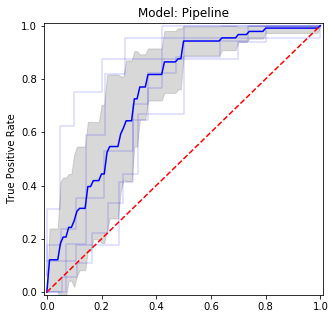

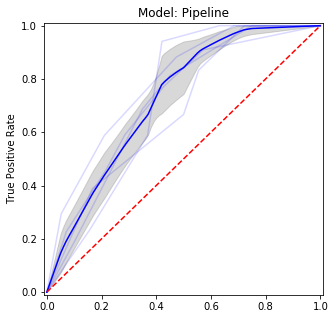

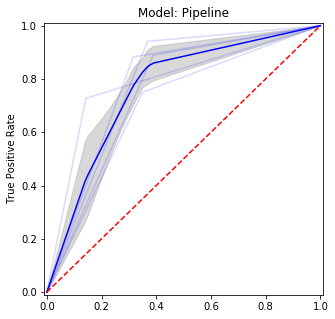

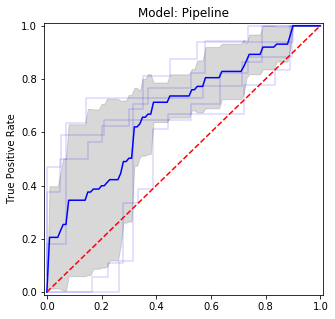

In [315]:
for name, model in pipelines:
    get_eval_ROC(model,X_new_t,Y_train)

Model: AdaBoostClassifier
ROC: 0.879 (0.228)
True Positive Rate: 0.946 , False Positive Rate: 0.287

Model: GradientBoostingClassifier
ROC: 0.886 (0.189)
True Positive Rate: 0.911 , False Positive Rate: 0.300

Model: RandomForestClassifier
ROC: 0.879 (0.158)
True Positive Rate: 0.895 , False Positive Rate: 0.353

Model: ExtraTreesClassifier
ROC: 0.866 (0.166)
True Positive Rate: 0.896 , False Positive Rate: 0.421



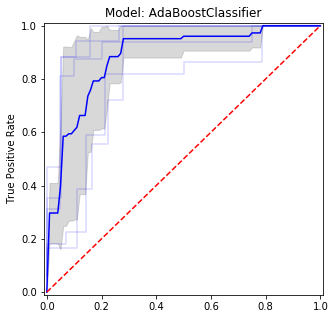

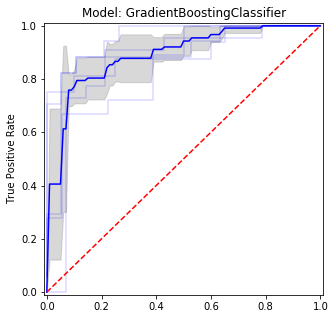

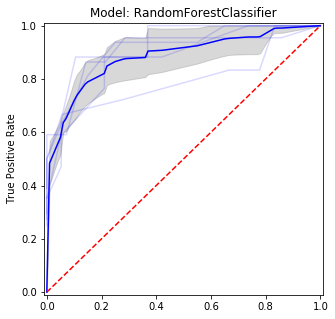

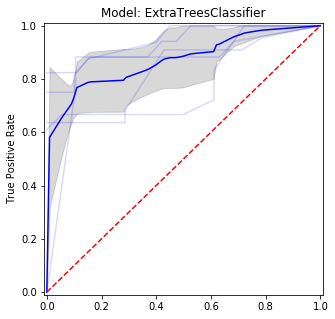

In [316]:
for name, model in ensembles:
    get_eval_ROC(model,X_new_t,Y_train)


 Model: AdaBoostClassifier
ROC: 0.858 (0.155)
True Positive Rate: 0.858 , False Positive Rate: 0.300

 Model: GradientBoostingClassifier
ROC: 0.924 (0.100)
True Positive Rate: 0.924 , False Positive Rate: 0.362

 Model: RandomForestClassifier
ROC: 0.935 (0.124)
True Positive Rate: 0.935 , False Positive Rate: 0.348

 Model: ExtraTreesClassifier
ROC: 0.953 (0.103)
True Positive Rate: 0.953 , False Positive Rate: 0.355


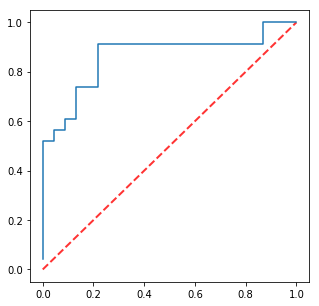

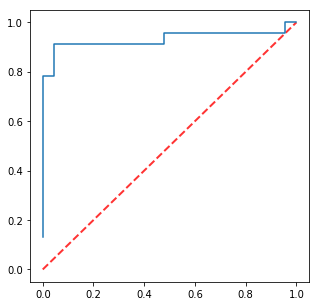

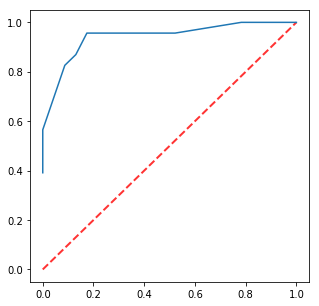

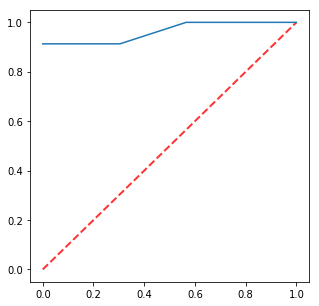

In [246]:
for name, model in ensembles:
    get_val_ROC(model,X_new_t,X_new_v,Y_train,Y_validation)


 Model: GradientBoostingClassifier
ROC: 0.924 (0.100)
True Positive Rate: 0.924 , False Positive Rate: 0.362


0.923805424020663

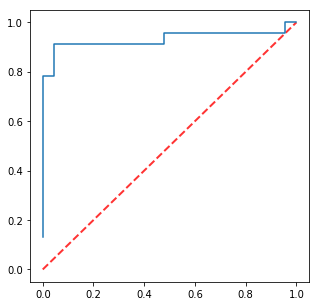

In [317]:
get_val_ROC(GradientBoostingClassifier(),X_new_t,X_new_v,Y_train,Y_validation)

Accuracy:0.8913043478260869
Model:GradientBoostingClassifier


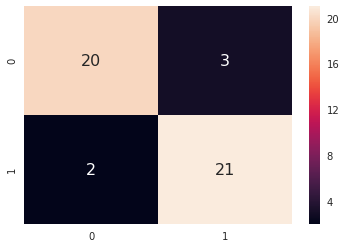

In [344]:
get_cm(GradientBoostingClassifier(),X_new_t,Y_train,X_new_v,Y_validation)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 20}
Best score:  0.9240740740740742
Model: RandomForestClassifier
ROC: 0.899 (0.154)
True Positive Rate: 0.958 , False Positive Rate: 0.271



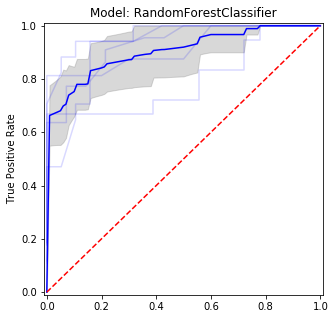

In [318]:
get_eval_ROC(randomforestgrid(X_new_t,Y_train),X_new_t,Y_train)

Accuracy:0.9130434782608695
Model:RandomForestClassifier


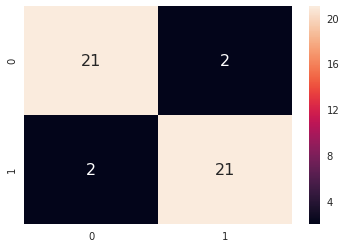

In [345]:
get_cm(RandomForestClassifier(max_depth = 10,min_samples_leaf = 1, n_estimators = 20),X_new_t,Y_train,X_new_v,Y_validation)


 Model: RandomForestClassifier
ROC: 0.926 (0.141)
True Positive Rate: 0.926 , False Positive Rate: 0.370


0.9257942315970726

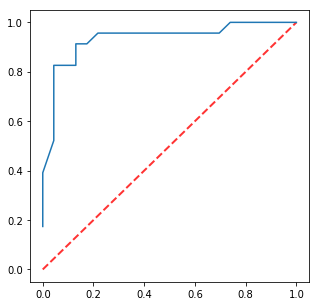

In [319]:
get_val_ROC(RandomForestClassifier(max_depth = 10,min_samples_leaf = 1, n_estimators = 20),X_new_t,X_new_v,Y_train,Y_validation)


-------------------------
Starting grid search
fitting
grid search done
Best params:  {'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 18}
Best score:  0.9407407407407408

 Model: RandomForestClassifier
ROC: 0.918 (0.116)
True Positive Rate: 0.918 , False Positive Rate: 0.323


0.9181091261300044

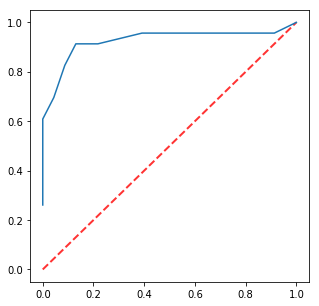

In [243]:
get_val_ROC(randomforestgrid(X_new_t,Y_train),X_new_t,X_new_v,Y_train,Y_validation)

In [320]:
import shap
shap.initjs()
gb = GradientBoostingClassifier().fit(X_new_t,Y_train)
rf = RandomForestClassifier(max_depth = 10,min_samples_leaf = 1, n_estimators = 20).fit(X_new_t,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_new_t)
shap_values = explainer.shap_values(X_new_v)

Using 180 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 46/46 [08:01<00:00, 10.48s/it]


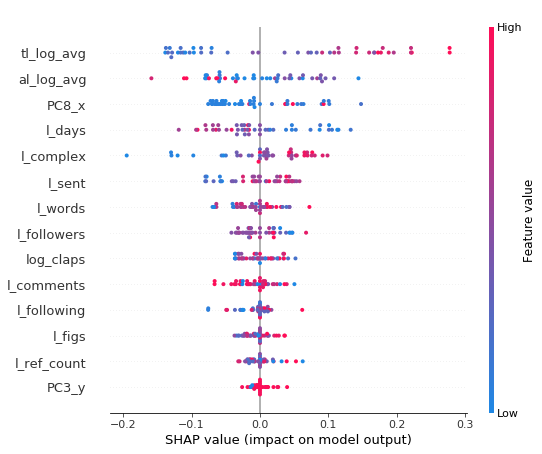

In [321]:
shap.summary_plot(shap_values[0],X_new_v)

In [322]:
shap_values = shap.TreeExplainer(rf).shap_values(X_new_t)


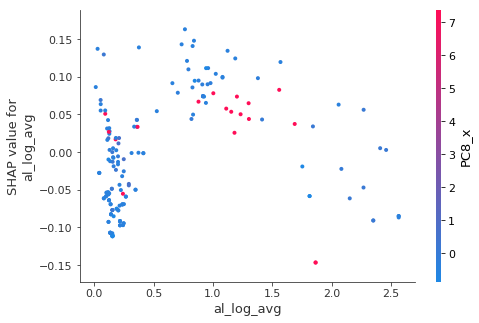

In [323]:
shap.dependence_plot("al_log_avg", shap_values[0], X_new_t)


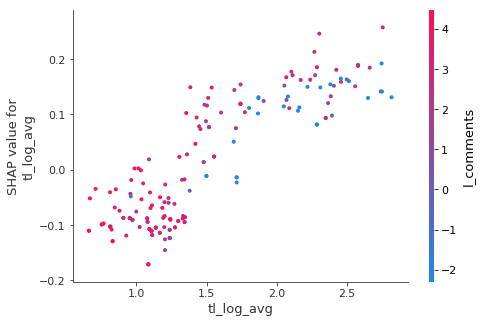

In [324]:
shap.dependence_plot("tl_log_avg", shap_values[0], X_new_t)


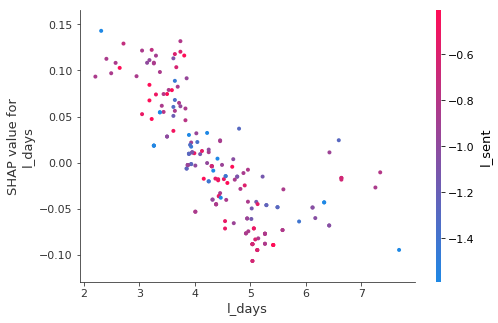

In [325]:
shap.dependence_plot("l_days", shap_values[0], X_new_t)


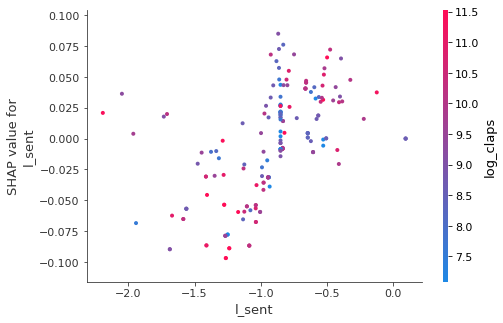

In [326]:
shap.dependence_plot("l_sent", shap_values[0], X_new_t)


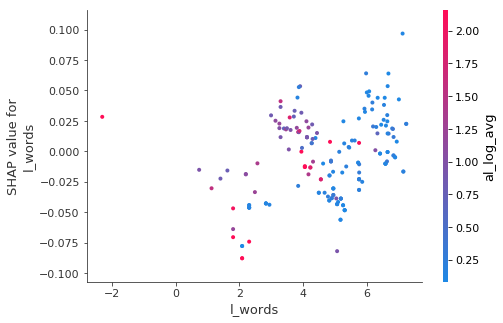

In [327]:
shap.dependence_plot("l_words", shap_values[0], X_new_t)


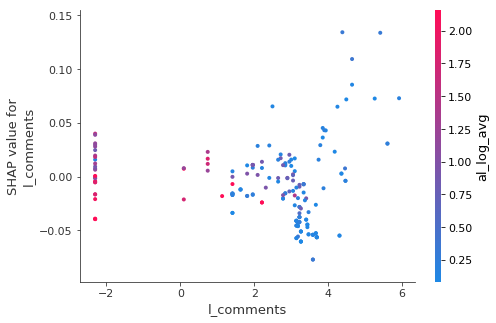

In [328]:
shap.dependence_plot("l_comments", shap_values[0], X_new_t)


In [329]:
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_new_t.iloc[0,:])

In [330]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_new_t)


In [331]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_new_t)

In [80]:
lr = LogisticRegression().fit(X_new_t,Y_train)
pred = lr.predict(X_new_v)
accuracy = accuracy_score(Y_validation,pred)
print(accuracy)

0.6785714285714286



 Model: LogisticRegression
ROC: 0.542 (0.214)
True Positive Rate: 0.542 , False Positive Rate: 0.556


0.5415841584158415

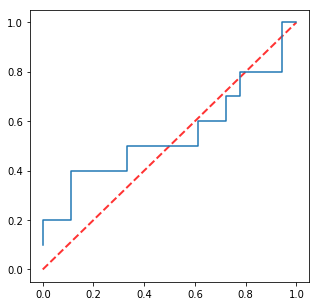

In [81]:
get_val_ROC(LogisticRegression(),X_new_t,X_new_v,Y_train,Y_validation)

In [82]:
lr.coef_

array([[ 0.52498935, -1.36237297,  0.41863336,  0.4953821 , -0.66781499,
        -0.35100413, -0.38097523,  0.30614918, -0.87531014,  0.3862461 ,
         0.61198063, -0.5596721 , -0.51400437, -0.39143862]])

In [83]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15, min_samples_leaf = 2, n_estimators = 9).fit(X_train,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_train)
shap_values = explainer.shap_values(X_validation)

Using 112 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 28/28 [06:25<00:00, 13.77s/it]


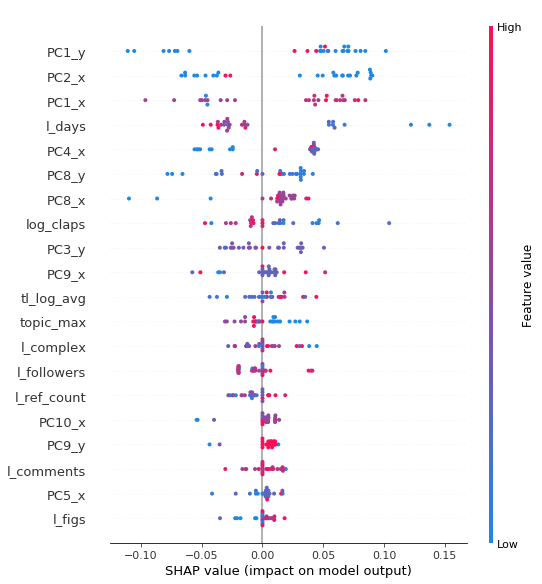

In [84]:
shap.summary_plot(shap_values[0],X_validation)


 Model: RandomForestClassifier
ROC: 0.953 (0.136)
True Positive Rate: 0.953 , False Positive Rate: 0.189


0.9534653465346535

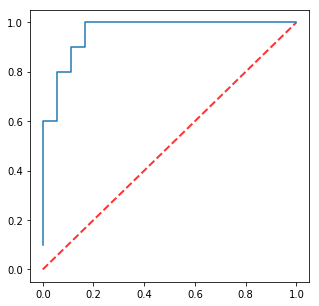

In [85]:
get_val_ROC(rf,X_train, X_validation, Y_train, Y_validation)

In [86]:
X_train.columns

Index(['topic_max', 'al_log_avg', 'tl_log_avg', 'title_sent_max', 'PC1_x',
       'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'PC9_x',
       'PC10_x', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y', 'PC7_y',
       'PC8_y', 'PC9_y', 'PC10_y', 'log_claps', 'l_comments', 'l_days',
       'l_figs', 'l_ref_count', 'l_words', 'l_followers', 'l_following',
       'l_sent', 'l_complex'],
      dtype='object')

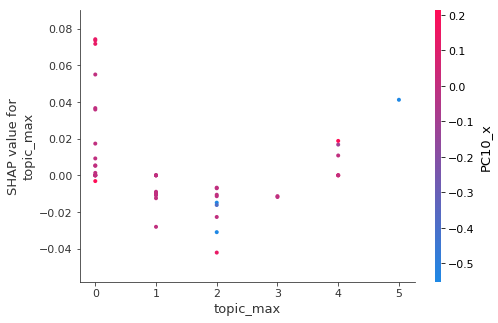

In [274]:
shap.dependence_plot("topic_max", shap_values[0], X_validation)


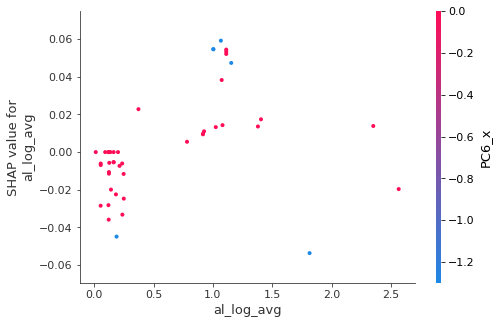

In [275]:
shap.dependence_plot("al_log_avg", shap_values[0], X_validation)


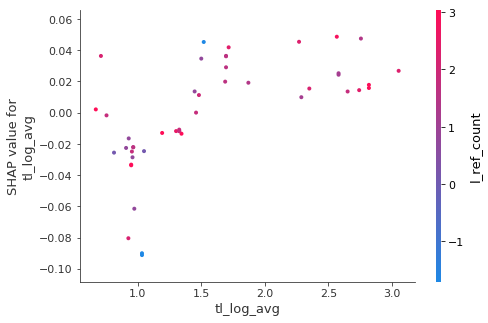

In [276]:
shap.dependence_plot("tl_log_avg", shap_values[0], X_validation)


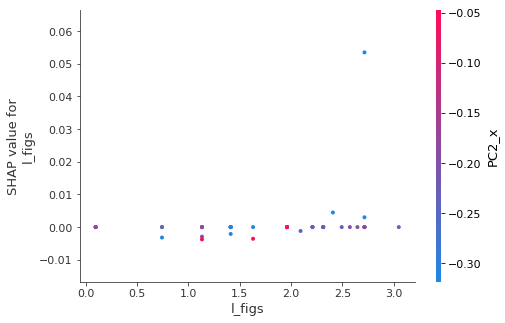

In [278]:
shap.dependence_plot("l_figs", shap_values[0], X_validation)


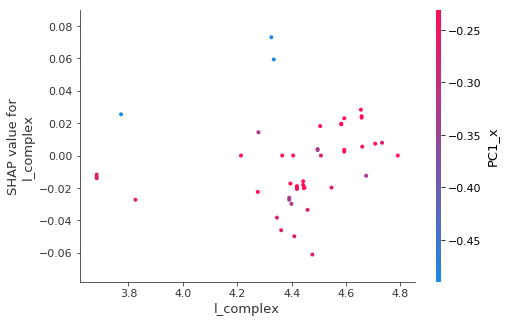

In [279]:
shap.dependence_plot("l_complex", shap_values[0], X_validation)


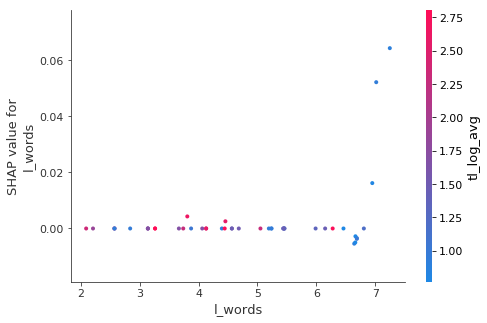

In [280]:
shap.dependence_plot("l_words", shap_values[0], X_validation)


In [332]:
shap_interaction_values = shap.TreeExplainer(rf).shap_interaction_values(X_new_t)


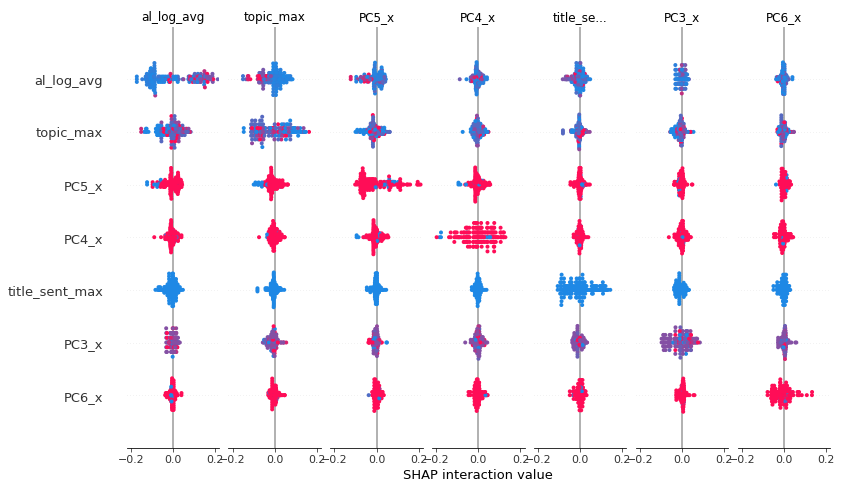

In [333]:
shap.summary_plot(shap_interaction_values[0], X_train)


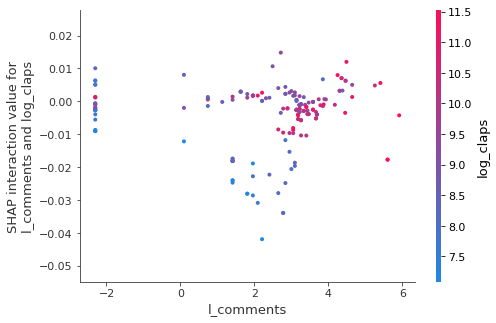

In [335]:
shap.dependence_plot(
    ("l_comments", "log_claps"),
    shap_interaction_values[0], X_new_t
)

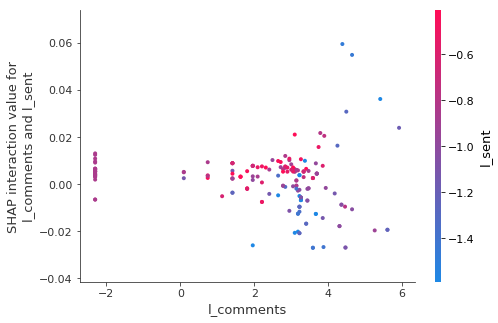

In [336]:
shap.dependence_plot(
    ("l_comments", "l_sent"),
    shap_interaction_values[0], X_new_t
)

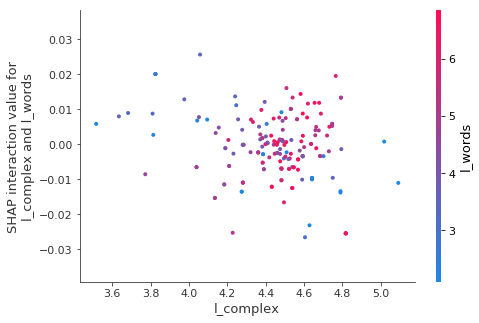

In [337]:
shap.dependence_plot(
    ("l_complex", "l_words"),
    shap_interaction_values[0], X_new_t
)

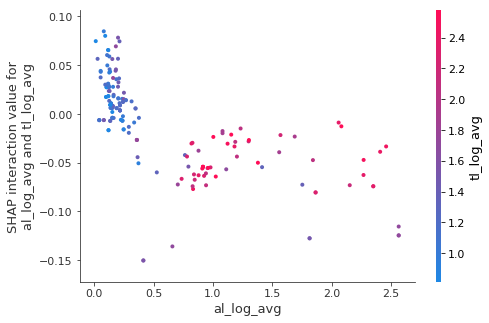

In [338]:
shap.dependence_plot(
    ("al_log_avg", "tl_log_avg"),
    shap_interaction_values[0], X_new_t
)

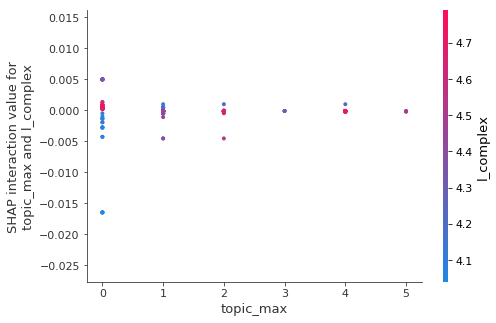

In [342]:
shap.dependence_plot(
    ("topic_max", "l_complex"),
    shap_interaction_values[0], X_train
)

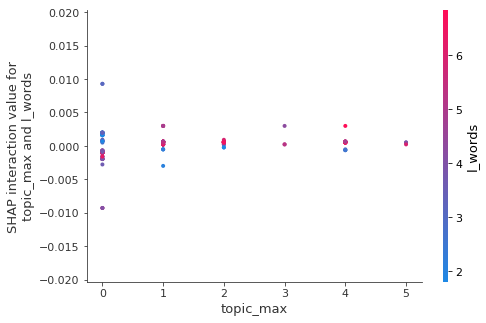

In [343]:
shap.dependence_plot(
    ("topic_max", "l_words"),
    shap_interaction_values[0], X_train
)

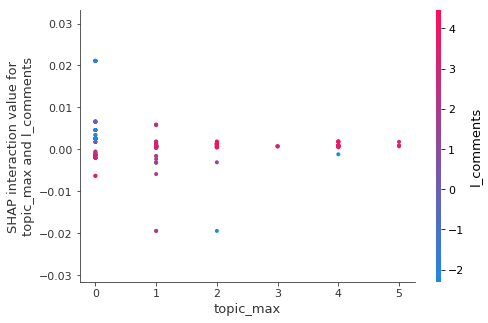

In [344]:
shap.dependence_plot(
    ("topic_max", "l_comments"),
    shap_interaction_values[0], X_train
)

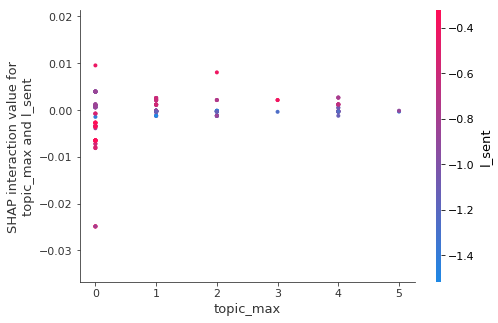

In [345]:
shap.dependence_plot(
    ("topic_max", "l_sent"),
    shap_interaction_values[0], X_train
)

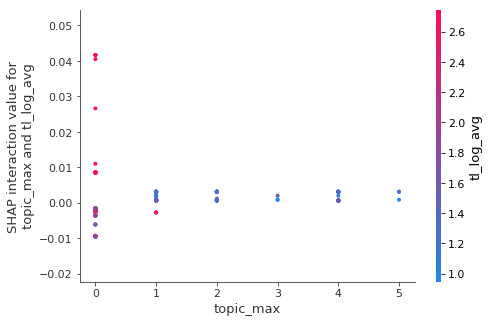

In [346]:
shap.dependence_plot(
    ("topic_max", "tl_log_avg"),
    shap_interaction_values[0], X_train
)

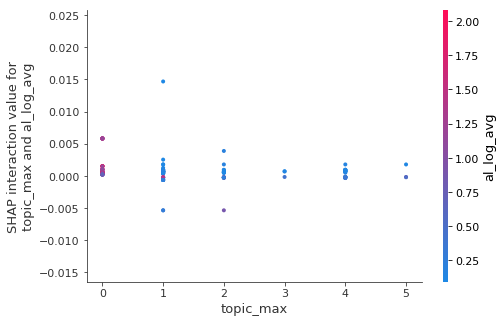

In [347]:
shap.dependence_plot(
    ("topic_max", "al_log_avg"),
    shap_interaction_values[0], X_train
)

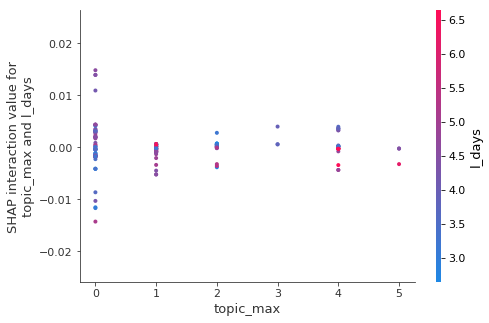

In [348]:
shap.dependence_plot(
    ("topic_max", "l_days"),
    shap_interaction_values[0], X_train
)

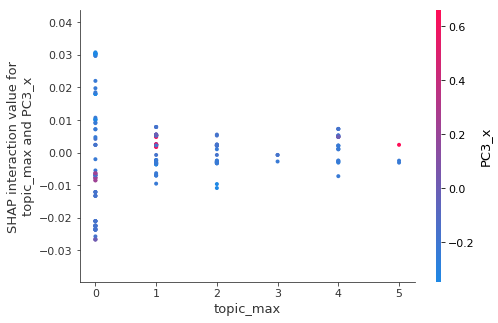

In [349]:
shap.dependence_plot(
    ("topic_max", "PC3_x"),
    shap_interaction_values[0], X_train
)

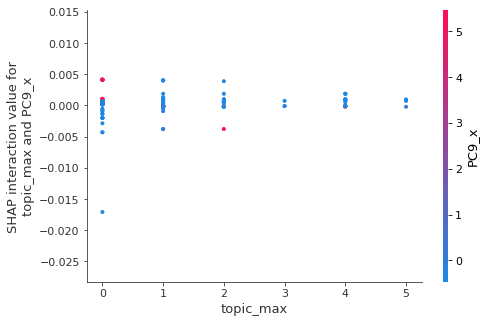

In [360]:
shap.dependence_plot(
    ("topic_max", "PC9_x"),
    shap_interaction_values[0], X_train
)

In [311]:
X_validation.columns

Index(['topic_max', 'al_log_avg', 'tl_log_avg', 'title_sent_max', 'PC1_x',
       'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x', 'PC9_x',
       'PC10_x', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y', 'PC5_y', 'PC6_y', 'PC7_y',
       'PC8_y', 'PC9_y', 'PC10_y', 'log_claps', 'l_comments', 'l_days',
       'l_figs', 'l_ref_count', 'l_words', 'l_followers', 'l_following',
       'l_sent', 'l_complex'],
      dtype='object')

In [376]:
X_total = X_new_t.append(X_new_v,ignore_index = True)

In [377]:
Y_total = Y_train.append(Y_validation, ignore_index = True)

Model: RandomForestClassifier
ROC: 0.933 (0.130)
True Positive Rate: 0.931 , False Positive Rate: 0.341



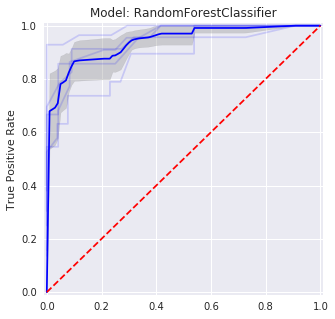

In [378]:
model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, n_estimators=20)
get_eval_ROC(model,X_total,Y_total)

In [383]:
model.score(X_total,Y_total)

0.9778761061946902

In [379]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15,min_samples_leaf = 2, n_estimators = 9).fit(X_total,Y_total)
explainer = shap.KernelExplainer(rf.predict_proba,X_total)
shap_values = explainer.shap_values(X_total)

Using 226 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 226/226 [47:12<00:00, 12.54s/it]


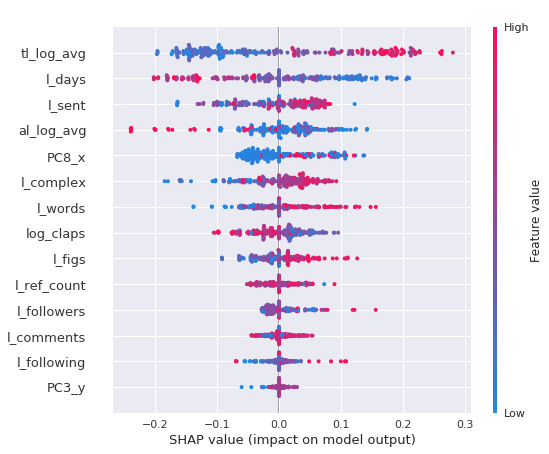

In [380]:
shap.summary_plot(shap_values[0],X_total)

In [381]:
shap_values = shap.TreeExplainer(rf).shap_values(X_total)


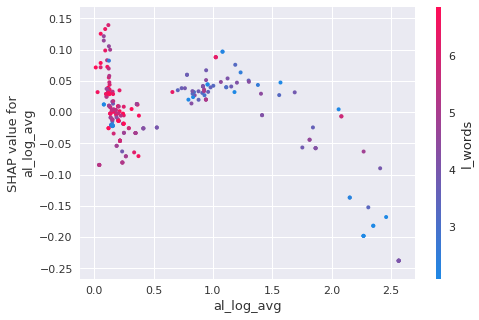

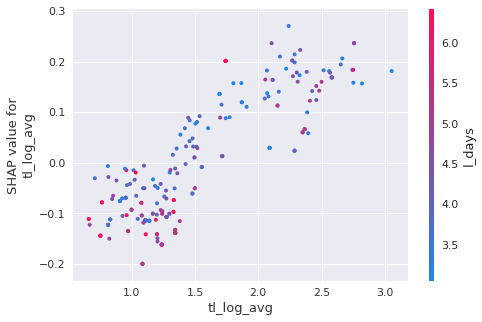

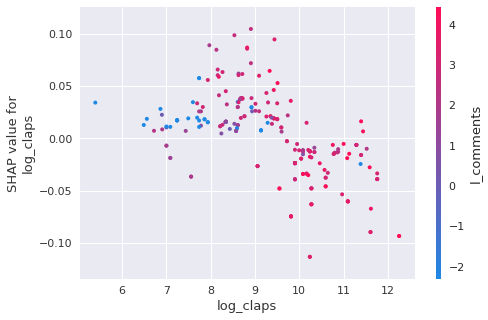

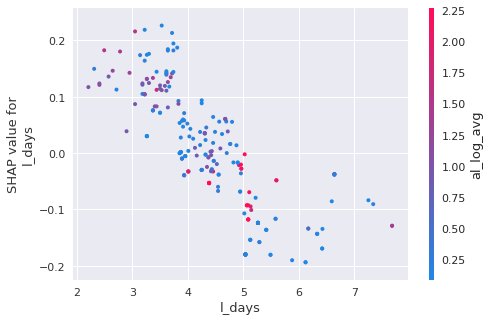

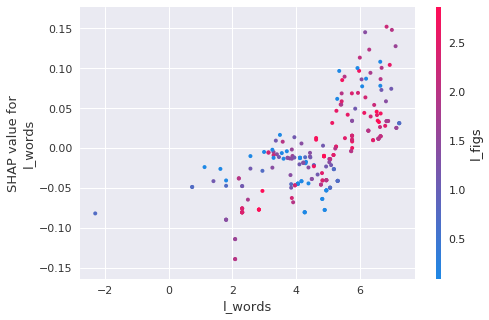

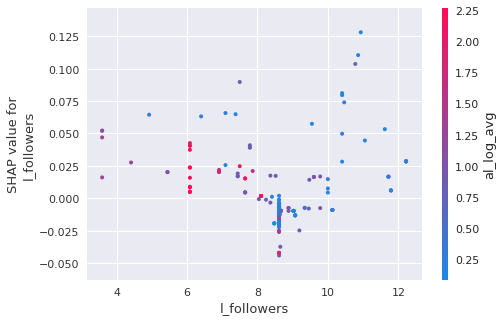

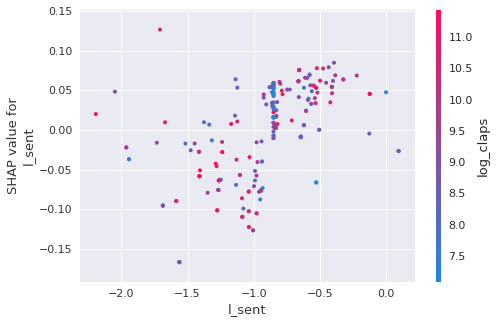

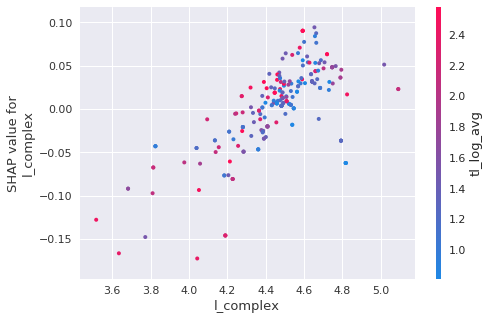

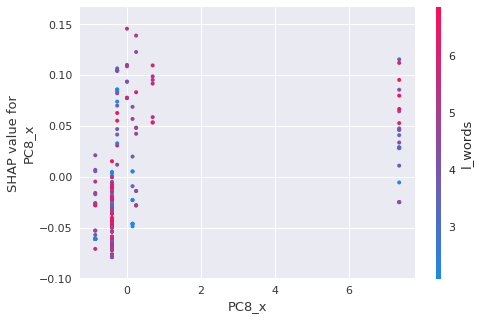

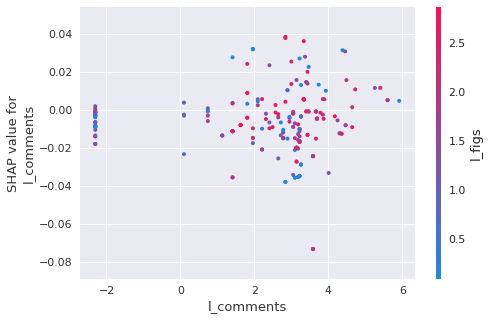

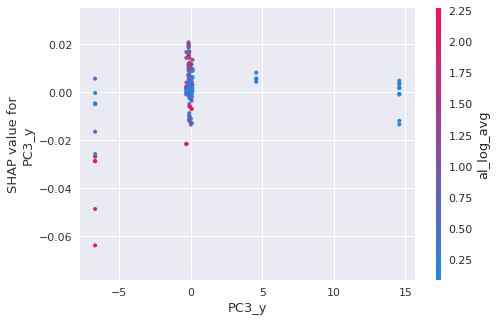

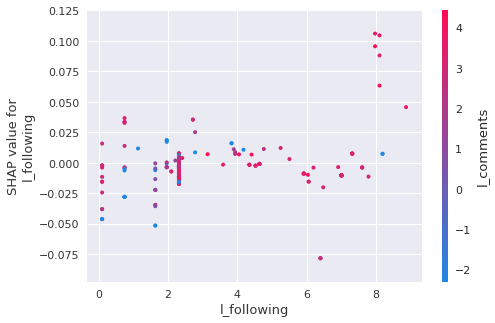

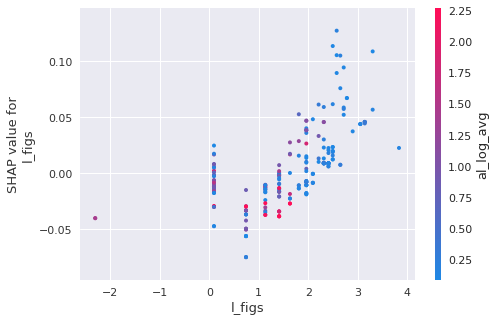

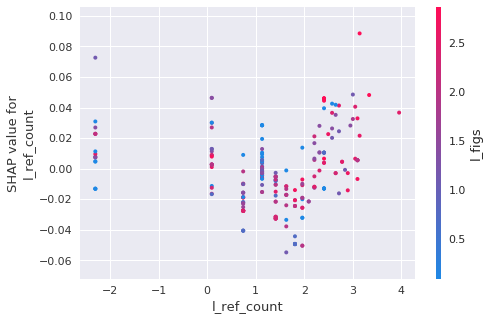

In [382]:
for x in X_total.columns:
    shap.dependence_plot(x, shap_values[0], X_total)

In [384]:
import shap
shap.initjs()
rf = RandomForestClassifier(max_depth = 15,min_samples_leaf = 2, n_estimators = 9).fit(X_new_t,Y_train)
explainer = shap.KernelExplainer(rf.predict_proba,X_new_t)
shap_values = explainer.shap_values(X_new_v)

Using 180 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.
100%|██████████| 46/46 [07:43<00:00, 10.07s/it]


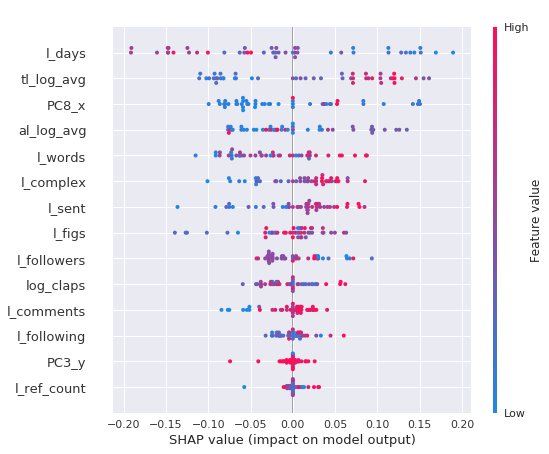

In [385]:
shap.summary_plot(shap_values[0],X_new_v)

In [386]:
shap_values = shap.TreeExplainer(rf).shap_values(X_new_t)


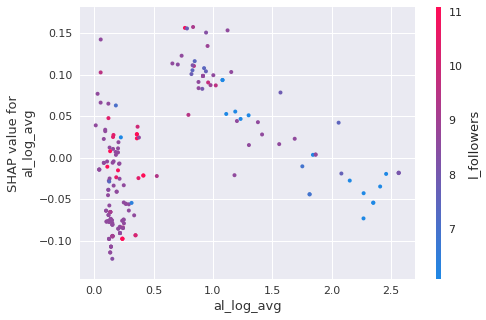

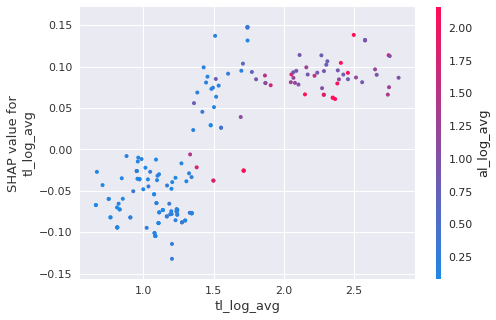

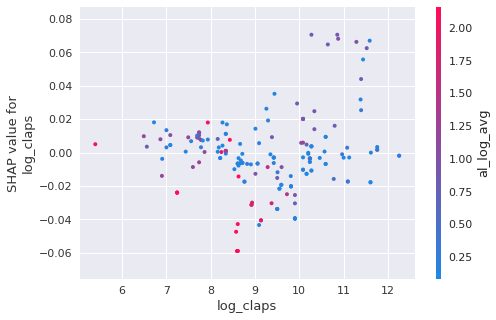

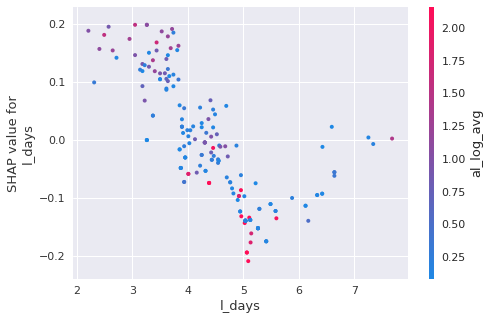

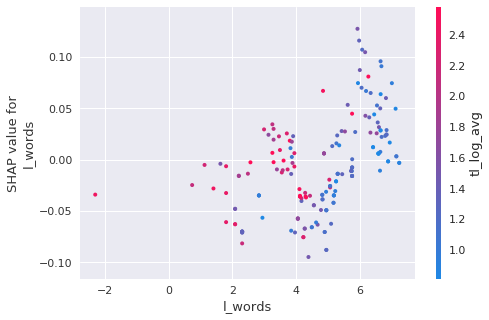

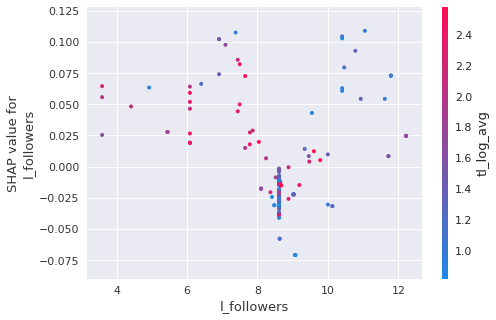

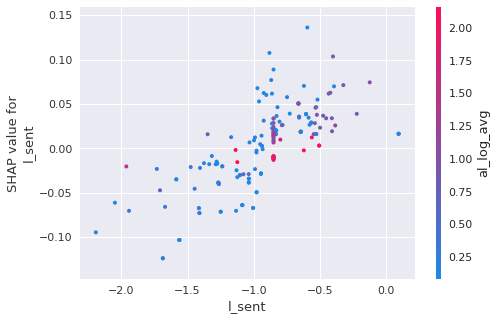

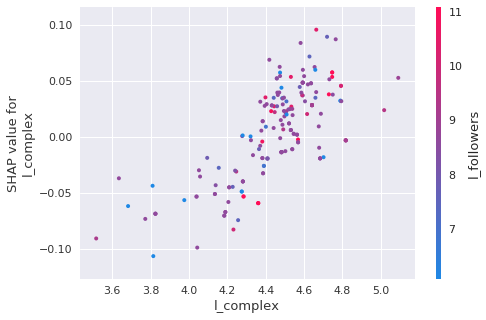

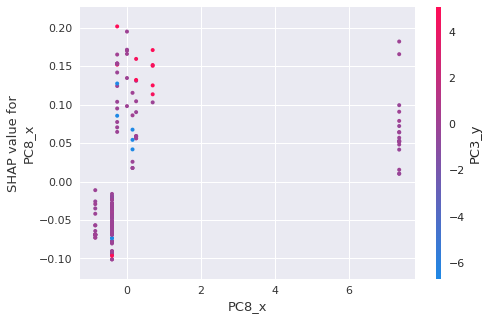

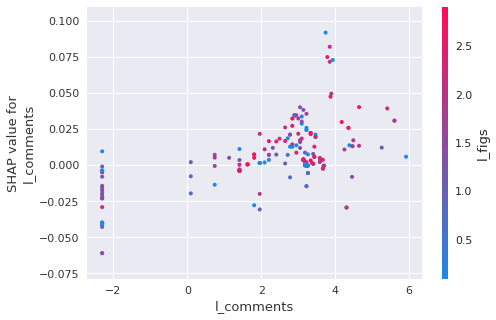

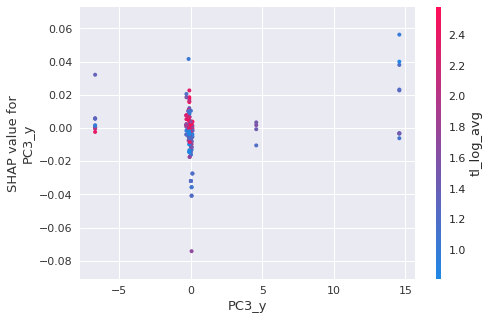

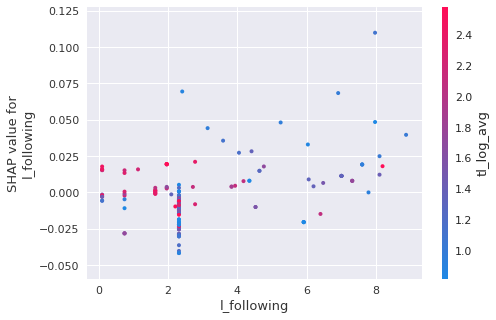

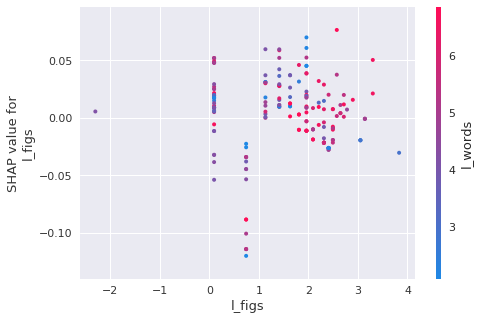

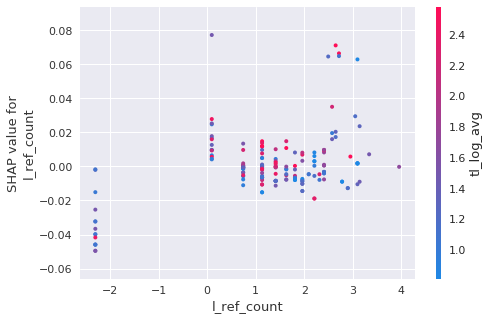

In [387]:
for x in X_new_t.columns:
    shap.dependence_plot(x,shap_values[0],X_new_t)